In [ ]:
.import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Load and pre-process the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Get the training and testing accuracy from the model's history
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 30ms/step - accuracy: 0.8967 - loss: 0.3537 - val_accuracy: 0.9839 - val_loss: 0.0521
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9825 - loss: 0.0550 - val_accuracy: 0.9882 - val_loss: 0.0374
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9891 - loss: 0.0372 - val_accuracy: 0.9878 - val_loss: 0.0359
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9911 - loss: 0.0290 - val_accuracy: 0.9901 - val_loss: 0.0312
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9929 - loss: 0.0223 - val_accuracy: 0.9887 - val_loss: 0.0342


In [ ]:
print("train accuracy:",train_accuracy[-1])
print("test accuracy",test_accuracy[-1])

train accuracy: 0.9921500086784363
test accuracy 0.9886999726295471


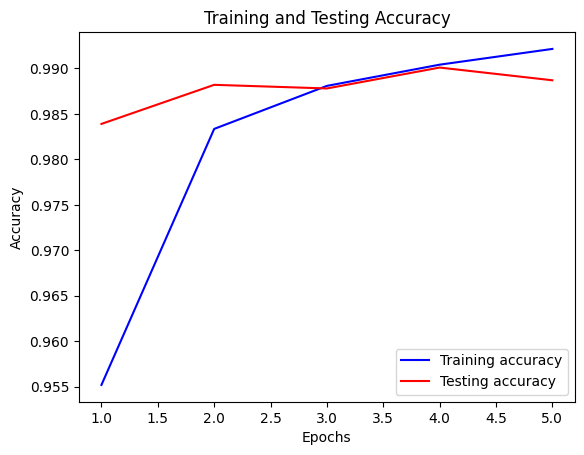

In [ ]:
# Create the plot
epochs = range(1, len(train_accuracy) + 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, test_accuracy, 'r', label='Testing accuracy')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#prediction using unseen data
from google.colab import drive
from tensorflow.keras.preprocessing import image
import numpy as np

# Mount Google Drive
drive.mount('/content/drive')

# Load the image from Drive
image_path = '/content/drive/MyDrive/image.png'
img = image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')

# Preprocess the image
img_array = image.img_to_array(img)
img_array = img_array / 255.0  # Normalize pixel values
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Make prediction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

print('Predicted class:', predicted_class)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted class: 2
